# 1. Dataset
The dataset we will be using is [IMDB movies review dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) which contains 50,000 reviews on movies with the labels: positive, negative

In [ ]:
import os
import pandas as pd

## 1.1 Kaggle
We will use kaggle to download the dataset.

NOTE: You will need a kaggle.json file, if you do not have it go to your Kaggle profile > account > apis and click "expire api token" and then "create new api token" this should download the kaggle.json file

In [ ]:
from google.colab.files import upload

In [ ]:
print("Installing kaggle")
!pip install kaggle -q
print("Upload kaggle.json")
upload()
print("Setting kaggle up...")
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!rm -fr sample_data
print("Done!")

Installing kaggle
Upload kaggle.json


Saving kaggle.json to kaggle.json
Setting kaggle up...
Done!


## 1.2 Downloading dataset


In [ ]:
DATA_FILENAME = "data.csv"

In [ ]:
if not os.path.exists(DATA_FILENAME):
  !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
  print("\nUnzipping dataset...")
  !unzip -q imdb-dataset-of-50k-movie-reviews.zip
  os.rename("IMDB Dataset.csv", DATA_FILENAME)
  os.remove("imdb-dataset-of-50k-movie-reviews.zip")
  print("Dataset is ready to be cleaned!")

 97% 25.0M/25.7M [00:02<00:00, 22.4MB/s]
100% 25.7M/25.7M [00:02<00:00, 12.6MB/s]

Unzipping dataset...
Dataset is ready to be cleaned!


## 1.3 Get inputs and labels
We will use pandas to read the csv file and store the two columns in thier seperate variables

In [ ]:
df = pd.read_csv(DATA_FILENAME)
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
inputs = df["review"].values
sentiments = df["sentiment"].values

## 1.4 Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(inputs, sentiments)

In [ ]:
print(
f"""
Shape of X_train, y_train: {X_train.shape}, {y_train.shape}
Shape of X_test, y_test: {X_test.shape}, {y_test.shape}
"""
)


Shape of X_train, y_train: (37500,), (12500,)
Shape of X_test, y_test: (37500,), (12500,)



## 1.5 Remove punctuation

In [ ]:
from string import punctuation

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
X_train[3]

"I first saw this film during and International Film Studies course. I am a 'non-traditional' student, and, perhaps for reasons of years-lived or wisdom-accrued, appreciated the slow, reflective pacing of the film's narrative. Languorous with the heat and dust of an arid clime, the story is deeply psychological, replete with multi-layered symbolism, and an articulate inversion of the theme of being the 'Other' in a land that one does not understand. the understanding that does come is fraught with the unresolved memories and subjectivity of the outsider. Made nearly 20 years ago, it is also a forerunner in a genre of numerous other international films that explore the themes of colonials in colonized spaces, clueless to the nuances of the cultures into which they have entered. Much more lavishly filmed---and heavily financed--- works that have been made since reflect the same themes: Indochine, Nowhere in Africa are two that in comparison perhaps make Chocolat seem pale and boring. It 

In [ ]:
for i, review in enumerate(X_train):
  X_train[i] = "".join([c for c in review if c not in punctuation])

In [ ]:
X_train[3]

'I first saw this film during and International Film Studies course I am a nontraditional student and perhaps for reasons of yearslived or wisdomaccrued appreciated the slow reflective pacing of the films narrative Languorous with the heat and dust of an arid clime the story is deeply psychological replete with multilayered symbolism and an articulate inversion of the theme of being the Other in a land that one does not understand the understanding that does come is fraught with the unresolved memories and subjectivity of the outsider Made nearly 20 years ago it is also a forerunner in a genre of numerous other international films that explore the themes of colonials in colonized spaces clueless to the nuances of the cultures into which they have entered Much more lavishly filmedand heavily financed works that have been made since reflect the same themes Indochine Nowhere in Africa are two that in comparison perhaps make Chocolat seem pale and boring It has no adrenalinepumping action 

## 1.6 Tokenize
We first get the 1000 most common words present in X_train and assign a numerical value to all those words, then create a new list where the items in it are the numerical values for the 1000 most common words for each review

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
class Tokenizer():
  def _preprocess_word(self, word):
    # Remove any characters which are not letters
    word = re.sub(r'[^a-zA-Z]+', '', word)
    return word
  
  def _get_non_common_words(self, array):
    word_list = []

    nltk.download("stopwords")
    common_words = set(stopwords.words("english"))
    for string in array:
      for word in string.lower().split():
        word = self._preprocess_word(word)
        if word not in common_words and word != "":
          word_list.append(word)
    
    return word_list
  
  def tokenize(self, X_train, X_test, y_train, y_test, amount_common_words=1000):
    word_list = self._get_non_common_words(X_train)
    corpus = Counter(word_list) # Get common words
    corpus = sorted(corpus, key=corpus.get, reverse=True)[amount_common_words] # Sort them based on commonnesss and get x (1000) amount of them
    corpus_num_dict = {w: i+1 for i, w in enumerate(corpus)} # Give numerical value to those common words

    X_train_tok, X_test_tok = [], []

    for review in X_train:
      # appends the numerical value of every word in review only if it is in the 1000 most common words (corpus_num_dict)
      X_train_tok.append([corpus_num_dict[self._preprocess_word(word)] for word in review.lower().split() if self._preprocess_word(word) in corpus_num_dict.keys()])
    
    for review in X_test:
      X_test_tok.append([corpus_num_dict[self._preprocess_word(word)] for word in review.lower().split() if self._preprocess_word(word) in corpus_num_dict.keys()])
    
    y_train_encodded = [1 if label == "positive" else 0 for label in y_train]
    y_test_encodded = [1 if label == "positive" else 0 for label in y_test]

    return X_train_tok, y_train_encodded, X_test_tok, y_test_encodded

In [ ]:
tokenizer = Tokenizer()

In [ ]:
X_train_tok, y_train_encodded, X_test_tok, y_test_encodded = tokenizer.tokenize(X_train, X_test, y_train, y_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(X_train_tok), len(y_train_encodded)

(37500, 12500)

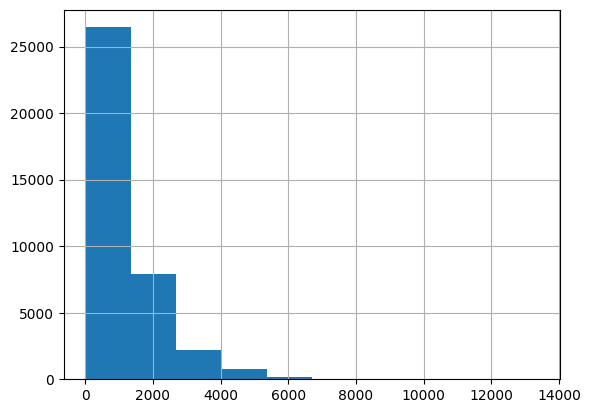

count    37500.000000
mean      1255.803920
std        950.707479
min         30.000000
25%        672.000000
50%        929.000000
75%       1523.000000
max      13346.000000
dtype: float64

In [ ]:
rev_len = [len(i) for i in X_train]
pd.Series(rev_len).hist()
plt.show()
print("")
pd.Series(rev_len).describe()